## Introduction 

* This report seeks to demonstrate the impact of providing a discount on the deposit for climate smart direct (CSD) on credit performance. 
* The credit performance can be viewed in two ways, either amount in arrears or whether payment is late or not.
* The statistical method used to compare the performance in both groups (discounted pricing accounts and standard pricing accounts) depends on the credit performance metric.  
* Since the amount in arrears is continuous data sampled from a non-normal distribution, we will use the Mann-Whitney U test to check whether the average arrears in both groups are statistically different.
* On the other hand, lateness is categorical data. Hence we will use the chi-square test to check for the relationship between lateness and pricing group.

In [65]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import table

In [4]:
df = pd.read_excel(r"C:\Users\sarah\Downloads\CSD Analysis Data (3).xlsx", sheet_name ="Sheet4")
df_list = []
for period in range(1,5):
    df_list.append(df[df["period"] == period])
print(df_list)

[     account_ref account_id               product     installment_date  \
123     11508492   VXAP1NFC  Climate Smart Direct  15/01/2021 00:00:00   
125     22893157   VADFS5JM  Climate Smart Direct  2021-01-05 00:00:00   
127      5606213   R9HD33ZG  Climate Smart Direct  2021-01-05 00:00:00   
128     21806664   R7RY2IEB  Climate Smart Direct  2021-01-05 00:00:00   
129      9659787   R7DSK9ZC  Climate Smart Direct  2021-01-05 00:00:00   
...          ...        ...                   ...                  ...   
3243    35668082   P4UT8X9N  Climate Smart Direct  25/10/2019 00:00:00   
3244    29219545   IOP1GB6C  Climate Smart Direct  25/10/2019 00:00:00   
3249    24591957   tkmvqS16  Climate Smart Direct  2019-08-05 00:00:00   
3250   5500057-1   p7BvqAOw  Climate Smart Direct  25/08/2019 00:00:00   
3251    21722271   CLZ57M36  Climate Smart Direct  25/07/2019 00:00:00   

      downpayment_amount  installment_amount  total_number_payments  \
123                 5999               

In [5]:
df_list[0].head()

,account_ref,account_id,product,installment_date,downpayment_amount,installment_amount,total_number_payments,status,total_repaid,net_repaid,...,expected_payment,arrears,overpay,days_late,late_client,credit_sale_net,balance,month_installment_paid2,payplan_name,pricing
123,11508492,VXAP1NFC,Climate Smart Direct,15/01/2021 00:00:00,5999,2850,24,Active,5999.0,0,...,2850,0,0,0,0,68400,68400,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
125,22893157,VADFS5JM,Climate Smart Direct,2021-01-05 00:00:00,5999,2850,24,Active,5999.0,0,...,2850,0,0,0,0,68400,68400,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
127,5606213,R9HD33ZG,Climate Smart Direct,2021-01-05 00:00:00,5999,2850,24,Active,5999.0,0,...,2850,0,0,0,0,68400,68400,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
128,21806664,R7RY2IEB,Climate Smart Direct,2021-01-05 00:00:00,5999,2850,24,Active,5999.0,0,...,2850,0,0,0,0,68400,68400,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
129,9659787,R7DSK9ZC,Climate Smart Direct,2021-01-05 00:00:00,5999,2850,24,Active,5999.0,0,...,2850,0,0,0,0,68400,68400,0,"CSD+RM2.taxed.5,999.2,850.24",Standard


In [42]:
df_list[0][["account_id", "arrears","late_client","payplan_name","pricing"]].sample(10)

,account_id,arrears,late_client,payplan_name,pricing
1137,e6be42f2,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
1159,3e32add6,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
1265,DZ9J7QJD,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
1160,SOMPRQGQ,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
2546,7d5f070f,0,0,CSD.159discount.taxed.1594.3100,Discounted
3251,CLZ57M36,1998,1,Climate.Smart.Direct.1999.18,Discounted
1470,H3L5YZNZ,0,0,CSD.Promo.4999.3100.18,Discounted
2148,DAXLUJJ2,0,0,Climate.Smart.Direct.1999.18,Discounted
1942,CUFWX5PD,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard
1322,2c929a22,0,0,"CSD+RM2.taxed.5,999.2,850.24",Standard


In [11]:
df_discounted_list = []
for df in df_list:
    df_discounted_list.append(df[df["pricing"] == "Discounted"])

df_standard_list = []
for df in df_list:
    df_standard_list.append(df[df["pricing"] == "Standard"])

print(df_discounted_list)
print(df_standard_list)

[     account_ref account_id               product     installment_date  \
189     22386670   5599deae  Climate Smart Direct  2021-01-05 00:00:00   
191     11296339   W35Q21X1  Climate Smart Direct  15/12/2020 00:00:00   
192     30960651   U38C1XWT  Climate Smart Direct  25/12/2020 00:00:00   
193     20103752   T218CNBJ  Climate Smart Direct  25/12/2020 00:00:00   
194    701616825   NQTSON1Q  Climate Smart Direct  15/12/2020 00:00:00   
...          ...        ...                   ...                  ...   
3243    35668082   P4UT8X9N  Climate Smart Direct  25/10/2019 00:00:00   
3244    29219545   IOP1GB6C  Climate Smart Direct  25/10/2019 00:00:00   
3249    24591957   tkmvqS16  Climate Smart Direct  2019-08-05 00:00:00   
3250   5500057-1   p7BvqAOw  Climate Smart Direct  25/08/2019 00:00:00   
3251    21722271   CLZ57M36  Climate Smart Direct  25/07/2019 00:00:00   

      downpayment_amount  installment_amount  total_number_payments  \
189                 3999               

In [12]:
print(df_discounted_list[0].shape)
print(df_standard_list[0].shape)

(152, 22)
(211, 22)


## Checking for normality

* This step is important as parametric methods such as the t-test assume that data is pulled from a normal distribution.
* We used a simple method of plotting a histogram and embedding the normal distribution plot to check for normality.
* The plots show that arrears are not normally distributed.
* We shall use the Mann-Whitney test which does not rely on distribution assumption.

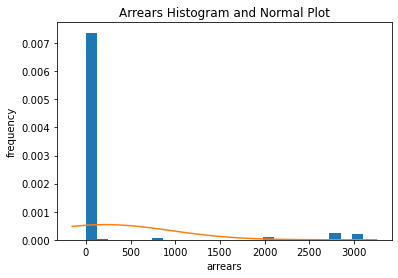

In [66]:
#plot the histogram
plt.hist(x=df_list[0]["arrears"], bins=25,density=True)

#plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = df_list[0]["arrears"].mean()
std = df_list[0]["arrears"].std()
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p)

plt.title("Arrears Histogram and Normal Plot")
plt.xlabel("arrears")
plt.ylabel("frequency")

plt.savefig('foo.png', bbox_inches='tight')

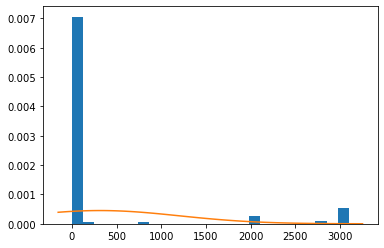

In [13]:
#plot the histogram
plt.hist(x=df_discounted_list[0]["arrears"], bins=25,density=True)

#plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = df_discounted_list[0]["arrears"].mean()
std = df_discounted_list[0]["arrears"].std()
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p)


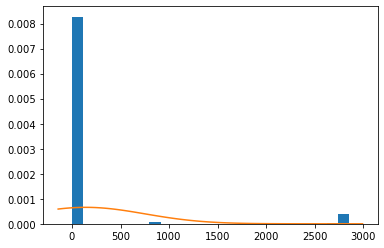

In [14]:
#plot the histogram
plt.hist(x=df_standard_list[0]["arrears"], bins=25,density=True)

#plot the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = df_standard_list[0]["arrears"].mean()
std = df_standard_list[0]["arrears"].std()
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p)

In [59]:
data = []
for df in df_discounted_list:
     data.append({"Mean":round(df["arrears"].mean(),2), "Variance":round((df["arrears"].std())**2,2), "Standard Deviation":round(df["arrears"].std(),2)})
    
summary = pd.DataFrame(data, index= ["1st installment","2nd installment","3rd installment","4th installment" ])  
summary

,Mean,Variance,Standard Deviation
1st installment,313.62,780939.27,883.71
2nd installment,601.36,2162817.07,1470.65
3rd installment,935.44,4888675.70,2211.03
4th installment,1475.59,10047148.59,3169.72


In [58]:
data = []
for df in df_standard_list:
    data.append({"Mean":round(df["arrears"].mean(),2), "Variance":round((df["arrears"].std())**2,2), "Standard Deviation":round(df["arrears"].std(),2)})
    
summary = pd.DataFrame(data, index= ["1st installment","2nd installment","3rd installment","4th installment"])  
summary

,Mean,Variance,Standard Deviation
1st installment,142.15,367976.64,606.61
2nd installment,236.70,1054093.29,1026.69
3rd installment,331.34,1785569.25,1336.25
4th installment,613.40,4244147.02,2060.13


In [57]:
data = []
for df in df_standard_list:
    data.append({"Yes":round(len(df["late_client"][df["late_client"] == 1])/len(df["late_client"]),2), "No":round(len(df["late_client"][df["late_client"] == 0])/len(df["late_client"]),2)})
    
summary = pd.DataFrame(data, index= ["1st installment","2nd installment","3rd installment","4th installment"])  
summary

,Yes,No
1st installment,0.06,0.94
2nd installment,0.06,0.94
3rd installment,0.08,0.92
4th installment,0.11,0.89


In [60]:
data = []
for df in df_discounted_list:
    data.append({"Yes":round(len(df["late_client"][df["late_client"] == 1])/len(df["late_client"]),2), "No":round(len(df["late_client"][df["late_client"] == 0])/len(df["late_client"]),2)})
    
summary = pd.DataFrame(data, index= ["1st installment","2nd installment","3rd installment","4th installment"])  
summary

,Yes,No
1st installment,0.12,0.88
2nd installment,0.17,0.83
3rd installment,0.21,0.79
4th installment,0.26,0.74


## Mann Whitney U test

* Null hypothesis: The two groups are the same.
* Alternate hypothesis: The two groups are different.
* Since the p-value is large (p>0.05), we conclude that the two groups are not statistically different.
* This means that putting a discount on the deposit had no impact on arrears.

In [62]:
data = []
for period in range(4):
    m, p = stats.mannwhitneyu(df_discounted_list[period]["arrears"], df_standard_list[period]["arrears"])
    data.append({"m-statistics":m, "p-value":round(p,4)})
    
summary = pd.DataFrame(data, index = ["1st installment","2nd installment","3rd installment","4th installment"])  
summary

,m-statistics,p-value
1st installment,14913.0,0.0094
2nd installment,14271.5,0.0004
3rd installment,12274.5,0.0003
4th installment,7356.0,0.0010


## Chi-Squared test

* Null hypothesis: No relationship exists between lateness and type of pricing.
* Alternate hypothesis: Lateness and type of pricing are not independent.
* The chi-squared test statistic is used to test the independence of categorical variables by crosstabulation.
* The contingency tables show the frequencies and row percentages of the intersection between the two variables.
* Since the p-value is greater than 0.05, we conclude that lateness and type of pricing are independent of each other and there is no significant association between the categorical variables.
* This means that putting a discount on the deposit did not affect whether payments will be late or not.

In [49]:
contigency_list = []
contigency_pct_list = []
for period in range(4):
    contigency = pd.crosstab(df_list[period]["late_client"], df_list[period]["pricing"])
    contigency_pct = pd.crosstab(df_list[period]["late_client"], df_list[period]["pricing"], normalize = "index")
    contigency_list.append(contigency)
    contigency_pct_list.append(contigency_pct)   

#print(contigency_list)
#print(contigency_pct_list)

In [63]:
data = []
for period in range(4):
    c, p, dof, expected = stats.chi2_contingency(contigency_list[period])
    data.append({"chi2-statistic":m, "p-value":round(p,4), "degrees of freedom":dof})
    
summary = pd.DataFrame(data, index = ["1st installment","2nd installment","3rd installment","4th installment"])  
summary

,chi2-statistic,p-value,degrees of freedom
1st installment,7356.0,0.0356,1
2nd installment,7356.0,0.0016,1
3rd installment,7356.0,0.0013,1
4th installment,7356.0,0.0032,1


## Conclusion

* Discounting did not affect credit performance in the first period of instalment payments.
* Further work will include checking if the pattern persists, that is, comparing newer and older instalment payments.